# scplotter to work with SlideSeq data prepared by Giotto

See: <https://drieslab.github.io/Giotto_website/articles/slideseq_mouse_brain.html>

Go back to scplotter documentation: <https://pwwang.github.io/scplotter/>

In [1]:
library(Giotto)

# Ensure Giotto can access a python env
genv_exists <- suppressMessages(checkGiottoEnvironment())
print(genv_exists)

python_path <- file.path(Sys.getenv("HOME"), "miniconda3", "envs", "giotto_env", "bin", "python")
Sys.setenv(RETICULATE_PYTHON = python_path)

invisible(capture.output(suppressMessages(set_giotto_python_path(python_path = python_path))))

# library(scplotter)
devtools::load_all()

Loading required package: GiottoClass



Newer devel version of GiottoClass on GitHub: 0.4.8

Giotto Suite 4.2.1



[1] TRUE


ℹ Loading scplotter


In [2]:
library(Giotto)

## Set instructions
results_folder <- "data/Giotto_SlideSeq.results"

instructions <- createGiottoInstructions(
    save_dir = results_folder,
    save_plot = FALSE,
    show_plot = TRUE,
    return_plot = TRUE,
    python_path = python_path
)

## Provide the path to the visium folder
data_path <- "data/Giotto_SlideSeq"

expression_matrix <- get10Xmatrix(file.path(data_path, "2020-12-19_Puck_201112_26.matched.digital_expression"))
spatial_locs <- data.table::fread(file.path(data_path, "2020-12-19_Puck_201112_26.BeadLocationsForR.csv.tar"))

spatial_locs <- spatial_locs[spatial_locs$barcodes %in% colnames(expression_matrix),]

giotto_object <- createGiottoObject(
  expression = expression_matrix,
  spatial_locs = spatial_locs,
  instructions = instructions
)

force(giotto_object)

python already initialized in this session
 active environment : 'giotto_env'
 python version : 3.10



An object of class giotto 
>Active spat_unit:  cell 
>Active feat_type:  rna 
dimensions    : 21697, 20618 (features, cells)
[SUBCELLULAR INFO]
[AGGREGATE INFO]
expression -----------------------
  [cell][rna] raw
spatial locations ----------------
  [cell] raw


Use objHistory() to see steps and params used

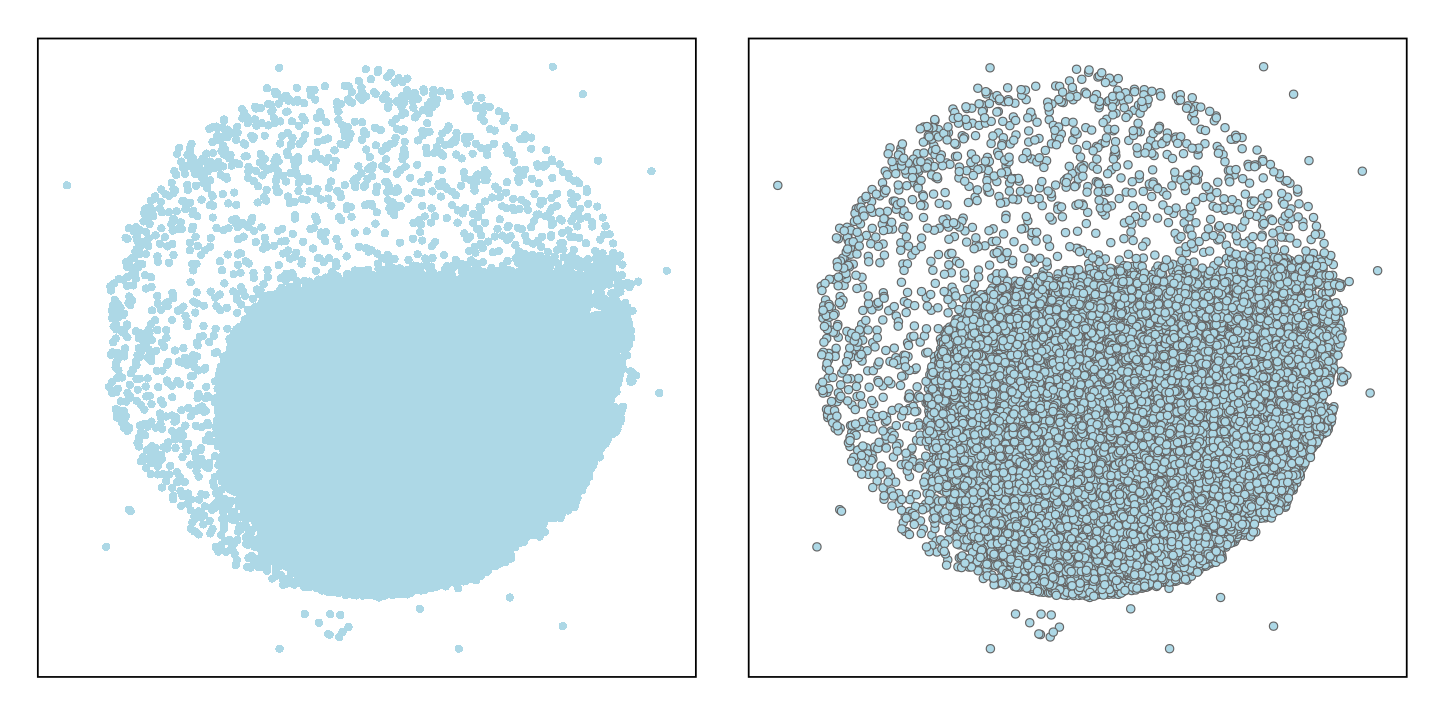

In [3]:
options(repr.plot.width = 12, repr.plot.height = 6)
# devtools::load_all()

p1 <- SpatDimPlot(giotto_object, points_size = 2, points_color_by = "lightblue")
p2 <- SpatDimPlot(giotto_object, points_size = 2, points_color_by = "lightblue",
    points_shape = 21, points_border_color = "grey40")

p1 + p2

In [4]:
giotto_object <- filterGiotto(giotto_object,
                              min_det_feats_per_cell = 10,
                              feat_det_in_min_cells = 10)

giotto_object <- normalizeGiotto(giotto_object)
giotto_object <- addStatistics(giotto_object)
giotto_object <- runPCA(giotto_object)
giotto_object <- runUMAP(giotto_object,
                         dimensions_to_use = 1:10)
giotto_object <- createNearestNetwork(giotto_object)

giotto_object <- doLeidenCluster(giotto_object,
                                 resolution = 1)

completed 1: preparation

completed 2: subset expression data

completed 3: subset spatial locations

completed 4: subset cell metadata

completed 5: subset feature metadata

completed 6: subset spatial network(s)

completed 7: subsetted dimension reductions

completed 8: subsetted nearest network(s)

completed 9: subsetted spatial enrichment results




Feature type:  rna 
Number of cells removed:  275  out of  20618 
Number of feats removed:  6204  out of  21697 


first scale feats and then cells



Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.3 GiB”
Setting expression [cell][rna] normalized

Setting expression [cell][rna] scaled

calculating statistics for "normalized" expression

"hvf" was not found in the gene metadata information.
 all genes will be used.

Setting dimension reduction [cell][rna] pca

Setting dimension reduction [cell][rna] umap



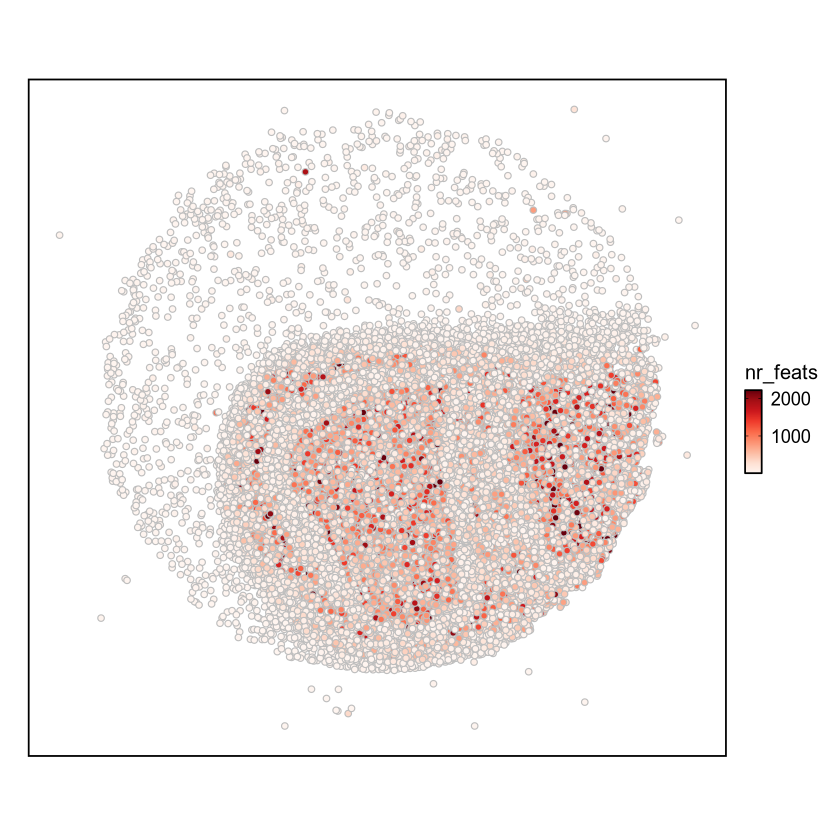

In [5]:
options(repr.plot.width = 7, repr.plot.height = 7)
# devtools::load_all()

SpatFeaturePlot(giotto_object, features = "nr_feats", points_shape = 21,
    points_palette = "Reds", points_border_color = "grey")

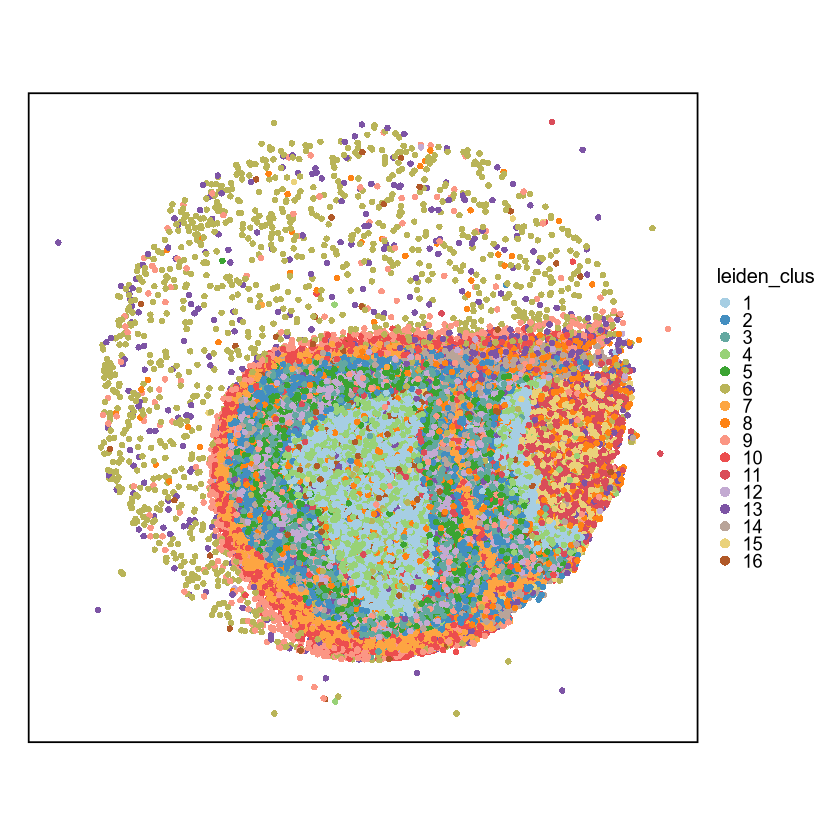

In [9]:
options(repr.plot.width = 7, repr.plot.height = 7)

SpatDimPlot(giotto_object, group_by = "leiden_clus")

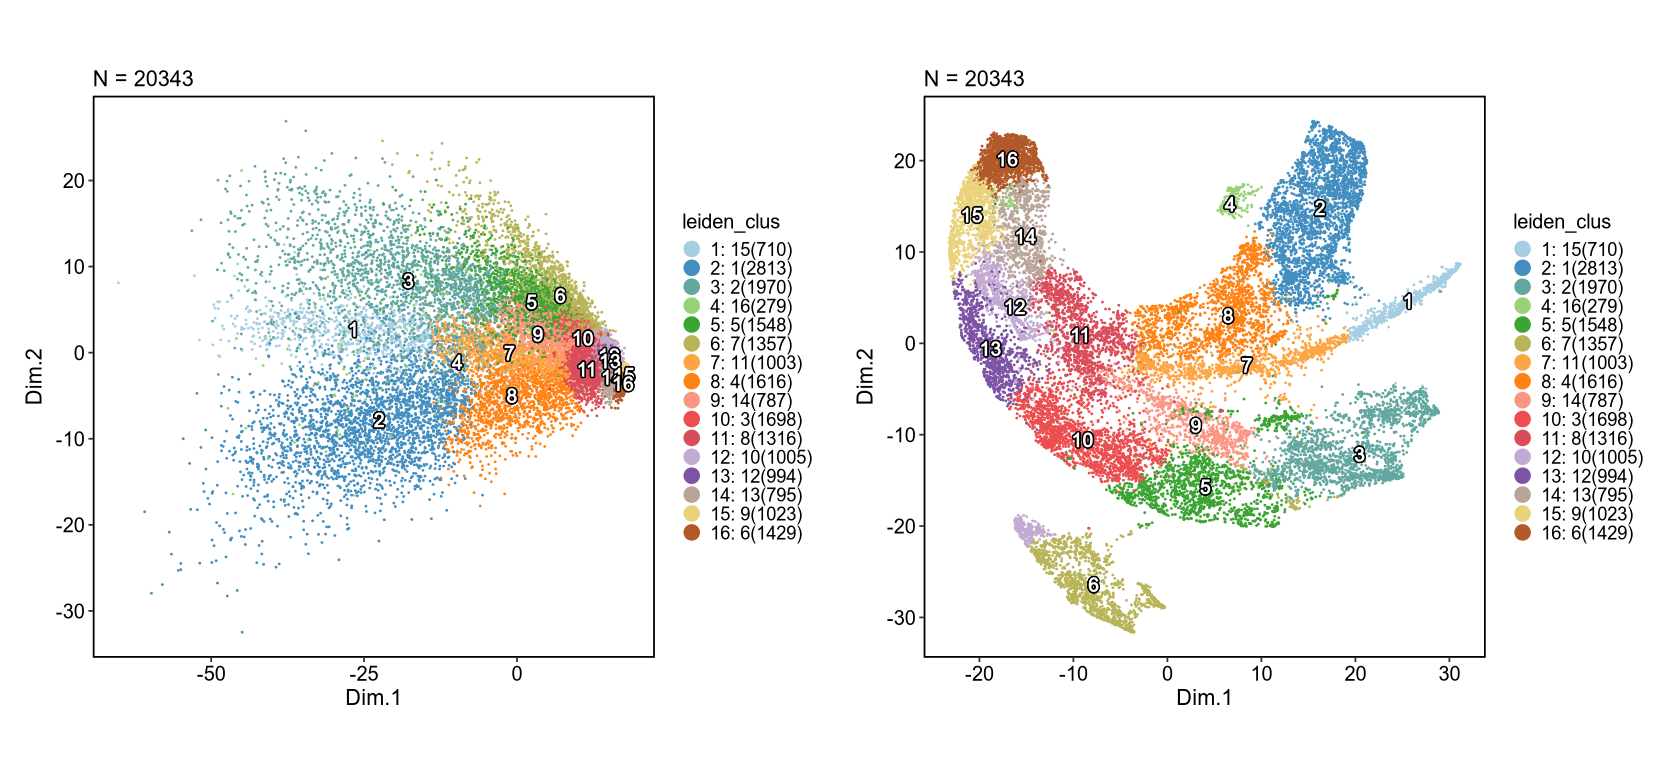

In [11]:
options(repr.plot.width = 14, repr.plot.height = 6.5)

p1 <- CellDimPlot(giotto_object, group_by = "leiden_clus", label = TRUE)
p2 <- CellDimPlot(giotto_object, group_by = "leiden_clus", reduction = "umap", label = TRUE)

p1 + p2

In [7]:
x <- sessionInfo()
x <- capture.output(print(x))
# hide the BLAS/LAPACK paths
x <- x[!startsWith(x, "BLAS/LAPACK:")]
cat(paste(x, collapse = "\n"))

R version 4.4.3 (2025-02-28)
Platform: x86_64-conda-linux-gnu
Running under: Red Hat Enterprise Linux 8.10 (Ootpa)

Matrix products: default

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=C              
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Chicago
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] scplotter_0.4.0   Giotto_4.2.1      GiottoClass_0.4.7

loaded via a namespace (and not attached):
  [1] fs_1.6.6                    matrixStats_1.5.0          
  [3] spatstat.sparse_3.1-0       bitops_1.0-9               
  [5] sf_1.0-20                   devtools_2.4.5             
  [7] httr_1.4.7         